# MT3510 Introduction to Mathematical Computing:

## Pure Mathematics Individual Project

## Sem 2, 2022/23

# Eulerian and Hamiltonian Graphs

This document outlines the individual project on Eulerian and Hamiltonian graphs for MT3510. It is important that you read this document carefully before starting any work.


## Getting help

Questions and queries are permitted, within reason, and can be directed to Dr Smith or the week 7 & 8 lab demonstrators. The preferred route of contact for outside the lab is email (fls3@).

## Submitting the project

Submission deadline is 5pm Friday 24th March via MySaint/MMS.

Submit a single Notebook file (as with the tutorials).

Late submissions will be dealt with using the standard policy (see [here](https://www.st-andrews.ac.uk/mathematics-statistics/students/taught-modules/late-work/)).

## Marking breakdown

| Code  60%                   | Written Answers 30% | Originality/Initiative 10% |
| --------------------------- | ------------------- | -------------------------- |
| Correct results 40%         | Accuracy 20%        | Free-choice extension 10%  | 
| Asymptotic complexity 10%   | Conciseness 10%     |                            |
| Readability and style 10%   |                     |                            |

The originality/initiative is available for work that extends the project specifications in some way. It is up to you what this looks like, but you should describe any such extension in the cell available at the end of this notebook. Please be sensible about the amount of extra work you do for this $10\%$; you are welcome to discuss it with me before submission.

## Project Description


In 1736, Leonhard Euler showed that there was no way to travel across the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg), crossing each bridge a single time and ending up where you started. He did this by showing that there is no *Eulerian circuit* in a graph representing the city, where vertices represent landmasses and edges represent bridges between them. This established the first result in graph theory.

More precisely, an *Eulerian circuit* is a cycle $v_1, v_2, \ldots, v_k = v_1$ such that every edge of the graph appears as $\{v_i, v_{i+1}\}$ for some $1 \leq i \leq k$, and no edge is repeated. In other words, it is a cycle which contains every edge of the graph precisely once. You can think about this as some way of travelling around the graph, crossing each edge precisely once. Note that this does **not** mean that each vertex has to be visited precisely once (or even at all!)

We say that a graph is *Eulerian* if there is some Eulerian circuit in the graph.

Euler's realisation was that the existence of an Eulerian circuit is related to the degrees of the vertices.


***Theorem:*** a graph has an Eulerian circuit if and only if every vertex has even degree, and all of the vertices of positive degree are in one connected component.

A few examples are shown below.

**1:** This example is Eulerian: every vertex has even degree, and there is only one connected component. An Eulerian circuit is `[0, 1, 2, 3, 4, 1, 3, 0]`.

**2:** This example is not Eulerian: it has a single connected component, but vertices 1 and 4 have odd degree.

**3:** This example is Eulerian: it does have multiple connected components, but only one of them contains vertices of positive degree, and each vertex has even degree. An Eulerian circuit is `[0, 1, 2, 3, 4, 1, 3, 0]`.

**4:** This example is not Eulerian; every vertex has even degree but the positive-degree vertices don't lie in a single connected component.

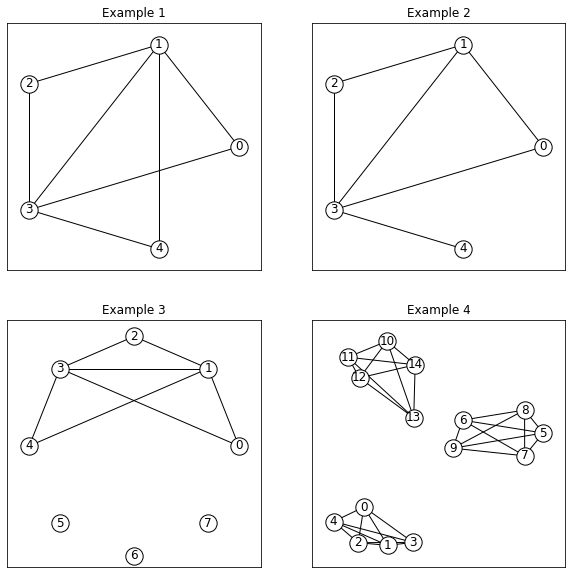

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

G = nx.Graph([{0, 1}, {1, 2}, {2, 3}, {3, 4}, {4, 1}, {1, 3}, {0, 3}])
nx.draw_networkx(G, ax=axs[0, 0], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G.remove_edge(4, 1)
nx.draw_networkx(G, ax=axs[0, 1], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G.add_edge(4, 1)
G.add_nodes_from(range(5, 8))
nx.draw_networkx(G, ax=axs[1, 0], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G = nx.caveman_graph(3, 5)
nx.draw_networkx(G, ax=axs[1, 1], pos = nx.spring_layout(G, k=1.1), node_color="w", edgecolors="k")

axs[0, 0].set_title("Example 1")
axs[0, 1].set_title("Example 2")
axs[1, 0].set_title("Example 3")
axs[1, 1].set_title("Example 4");


## Part 1

One of the proofs of the theorem above is constructive; it defines an algorithm and then shows that the algorithm outputs an Eulerian circuit given the hypotheses of the theorem. The algorithm is as follows:

```
1. Initialise a stack of vertices: pick a vertex u in G, and set stack = [u]
2. Initialise an output circuit: set circuit = []
3. While the stack is not empty:
    4. Call the last element in the stack current_vertex.
    5. If there are any edges from current_vertex that haven't already been considered:
        6: Pick one such edge {current_vertex, neighbour}.
        7. Note that this edge cannot be used again (from either direction).
        8. Append neighbour to the stack.
    9. Otherwise, if there are no such edges, then pop current_vertex from the stack and append it to circuit.
10. Return circuit.
```
The algorithm above finds an Eulerian circuit in a *connected* graph if it has one.

-  Implement this algorithm as a function `eulerian_circuit`.

-  Describe the theoretical worst-case complexity of `eulerian_circuit`, using appropriate parameters for the input size. Is it possible for any algorithm for finding an Eulerian circuit in a connected graph to have a better worse-case complexity than this?

#### Details/clarifications

1. For full credit, your function should not introduce any extra asymptotic complexity not already inherent in the algorithm.
2. You should assume while writing this function that the input will be a connected `networkx` `Graph` which has an Eulerian circuit.
3. You should assume while describing the complexity that $G$ is represented as $(V, E)$ as usual.
4. You are free to assume that the vertices will be the integers `0, 1, ..., len(G) - 1`.
5. If there is no Eulerian circuit, you should instead return `None`.

In [2]:
# YOUR CODE HERE
import networkx as nx

def eulerian_circuit(G):
    
    #picking node in G
    nodes = list(G.nodes)

    u = 0 
    
    stack = [u]
    circuit = []
    seen_edges = []
    
    def any_seen():
        #Function that checks whether there are any edges not previously seen and if yes, outputs such an edge.
        #suppose seen_edges has (3,2)
        #we check (2,3) in edges -> This function must return false
        #if the edge AND the inverse edge are not in seen_edges then we can return True
        for x in edges:
            if (x not in seen_edges) and (x[::-1] not in seen_edges):
                return [True,x]
        return [False]
    
    #While the stack has elements
    while stack:
        
        #set to last element in stack
        current_vertex = stack[-1]
        edges = G.edges(current_vertex) 
        
        #check if there are any edges not previously considered
        # want to run if there are any x in edges that are NOT in seen_edges
        if any_seen()[0]:
            
            
            picked_edge = any_seen()[1]
            seen_edges.append(picked_edge) # as this edge can't be used again we append to seen_edges
            
            stack.append(picked_edge[1]) # append to the stach the neighbour of current_vertex in the chosen edge

        else:

            stack.pop()
            circuit.append(current_vertex)
            
            
    #Need to test whether circuit is Eulerian
    #Test that every edge in the circuit exists in the graph and remove the edge from the graph
    #If at the end the graph is empty (i.e all elts in the circuit correspond to an edge and together they cover all edges in the graph) it is an Eulerian circuit
    all_edges = list(G.edges())
    
    
    for i in range(0, len(circuit)-1):
        circuit_edge = (circuit[i],circuit[i+1])
        
        if circuit_edge in all_edges:
            all_edges.remove(circuit_edge)
            
        elif circuit_edge[::-1] in all_edges:
            all_edges.remove(circuit_edge[::-1])
            
        else:
            return None
    if all_edges ==[]:
        return circuit
    

For a graph with n edges:

1. Declaring the variables has complexity O(1)
2. The while loop has complexity O(n) -> it will not run more than n times
3. The any_seen function within the while loop:

    3.1 The outer loop has complexity O(n), as it is a fixed loop over edges
    3.2 The conditional statement has complexity O(n), as it needs to check edges consecutively
    
So overall any_seen has complexity O(n^2)

4. The final part - testing to see if the circuit is eulerian has complexity O(n), as it is also a fixed loop over edges.

So the overall complexity for eulerian_circuit is O(n^3)

There are better algorithms for this task: for example Fleury's Algorithm can find a circuit in a connected graph in O(n^2).

In [3]:
if not "eulerian_circuit" in globals():
    raise NotImplementedError("eulerian_circuit not defined")


## Part 2

In order to apply the theorem, we need to be able to check whether all of the positive-degree vertices are connected. One way of doing this is to start a traversal from any positive-degree vertex, and check if it visits all of the others.


- Implement a function `all_positive_degree_vertices_connected` which takes a `networkx` `Graph` and returns `True` if all vertices of positive degree are connected, and `False` otherwise. This should use a depth-first or breadth-first traversal.

- Describe the complexity of decioing whether a graph is Eulerian using:
    1. A combination of the functions `eulerian_circuit` and `all_positive_degree_vertices_connected` (i.e. testing whether `eulerian_circuit` returns `None` or `all_positive_degree_vertices_connected` returns `False`).    
    2. Directly applying the characterisation using degrees as described in the introduction.
    - In other words, answer the question "*can we achieve a better theoretical complexity using the theorem above if we only want to **decide** whether there is an Eulerian circuit, rather than find one*?"

**Details/Clarifications**
1. The same details as for part 1 apply, other than `G` being connected.

In [4]:
# YOUR CODE HERE
def all_positive_degree_vertices_connected(G):
    
    #Finding the positive-degree vertices
    pos_vert = []
    
    for vertex in set(G.nodes()):
        
        #If the vertex has neighbours, append to pos_vert
        if G[vertex] !={}:
            pos_vert.append(vertex)

    #Depth-first traversal
    def dive():
        
        last_in_path = seen[-1]
        
        for x in G[last_in_path]:
            
            if x not in seen:
                
                seen.append(x)
                
                dive()
    
    #If positive degree vertices exist start the traversal. Else, return true.
    if pos_vert != []:
        
        seen = [pos_vert[0]]
        dive()
    else:
        return True
    
    # Now need to test whether seen has all the vertices that are in pos_vert
    for vertex in seen:
        
        if vertex in pos_vert:
            
            pos_vert.remove(vertex)
    
    #If the vertices in seen have removed all the vertices in pos_vert then the traversal has visited all vertices,
    # of positive degree
    
    if pos_vert == []:
        return True
    
    else:
        return False
            
        


1.The worst case in terms of time taken is if all_positive_vertices_connected returns True, and eulerian_circuit has to fully run in order to determine whether the graph is eulerian (as eulerian_circuit has higher complexity) . So overall, deciding if a graph is Eulerian with this method will be O(n^3).

2. Here we only need to loop over the vertices and determine the degree of each vertex. Determining the degree requires looping over every edge out of the vertex. So overall the method will have complexity O(n^2)

As 2. has a better theoretical complexity than 1. , deciding whether an eulerian circuit exists can be done at a lower complexity than finding one.

In [5]:
if not "all_positive_degree_vertices_connected" in globals():
    raise NotImplementedError("all_positive_degree_vertices_connected not defined")

## Part 3

In the same way that an *Eulerian* cycle is one which contains every edge precisely once, a *Hamiltonian* cycle is one which contains every *vertex* precisely once (apart from whichever vertex is picked to be "first", which must be visited twice to obtain a cycle). Determinining whether a graph is *Hamiltonian* (contains a Hamiltonian cycle) is significantly harder than determining whether it is Eulerian. In particular, it is NP-complete.


- Implement a function `hamiltonian_cycle` which uses a backtrack search to find a Hamiltonian cycle in a graph, if one exists.
- Use your function to find a Hamiltonian cycle in the Hoffman-Singleton graph.

Details:
1. Your function should return `None` if the graph is not Hamiltonian.
2. You should return a `list` of vertices representing the cycle; the first vertex in the list should also appear at the end to close the cycle.

In [6]:
# YOUR CODE HERE
def hamiltonian_cycle(G):
    
    vertices = list(G.nodes)
    partial_solution = [vertices[0]]
    seen = [vertices[0]]
    
    #Want to check whether partial solution is a Hamiltonian cycle
    def is_solution(partial_solution):
        first = partial_solution[0]
        
        #if the first and last elements are equal(is a cycle)
        #and the length is equal to 1 more than that of vertices
        if (first == partial_solution[-1]) and (len(partial_solution)==len(vertices)+1):
            
            #want to check that every vertex is contained in partial_solution

            if all(x in vertices for x in partial_solution):
                
                #if all these conditions hold then it is a solution
                return True
            
        else:
            return False
                
                
            
        
    
    def dive(partial_solution,seen):
        
        if is_solution(partial_solution):

            return partial_solution
        
        #Extending the solution
        for neighbour in list(G[partial_solution[-1]]):
            
            #We want to use neighbour if (it is not in seen) or (if it is equal to first element and 
            # the length of the list is equal to vertices
            if (neighbour not in seen) or (neighbour == partial_solution[0] and len(partial_solution) == len(vertices)):
                
                partial_solution.append(neighbour)
                seen.append(neighbour)
                continuation = dive(partial_solution,seen)

                if continuation != None:
                    return continuation

                #Need to clean up partial_solution
                else:

                    #Looping backwards as there may be a repeated vertex ( to close the cycle) and we want to remove the last
                    for i in range(len(partial_solution)-1,0,-1):

                        if partial_solution[i] == neighbour:

                            last_index = i

                            break
                            
                    #roll back to what partial_solution was before checking particular neighbour
                    partial_solution = partial_solution[0:i]
                    #seen should remove all until that point in partial solution
                    seen = seen[0:i]
 
                    
        return None
    
    return dive(partial_solution,seen)

G = nx.hoffman_singleton_graph()
print("A hamiltonian cycle of the hoffman-singleton graph : ",hamiltonian_cycle(G))

A hamiltonian cycle of the hoffman-singleton graph :  [0, 1, 17, 4, 3, 5, 12, 11, 2, 10, 18, 6, 22, 13, 30, 19, 7, 34, 15, 35, 25, 9, 32, 23, 14, 31, 20, 37, 29, 16, 33, 27, 44, 43, 42, 26, 38, 24, 41, 40, 21, 36, 39, 28, 48, 47, 45, 46, 49, 8, 0]


In [7]:
if not "hamiltonian_cycle" in globals():
    raise NotImplementedError("hamiltonian_cycle has not been defined")

## Originality/Initiative

As described in the introduction, the maximum grade available without going beyond the project specifications is $90\%$, and to achieve the final $10\%$ you must extend the project in some way. What form this takes is entirely up to you, as long as you still meet the specifications of each part. You are welcome to discuss this with me before submission.

If you have extended the project in some way, then please briefly outline what you have done in the cell below.

A hypohamiltonian graph is a graph G such that G itself does not have a Hamiltonian cycle but every graph formed by removing a single vertex from G does have a Hamiltonian cycle. Below I have implemented a function, making use of previous parts of the project, that takes an input networkx graph G and return True, if G is hypohamiltonian and False otherwise.

In [8]:
def is_hypohamiltonian(G):

    # If the graph is not connected or does not have a Hamiltonian cycle then it cannot be hypohamiltonian
    # a built in networkx function is_connected checks for connected.
    # and the previous hamiltonian_cycle function for the hamiltonian cycle.
    
    if not nx.is_connected(G) or (hamiltonian_cycle(G))!=None:
        return False

    # Check if the graph is hypohamiltonian
    # for every node, remove this node and check if a hamiltonian cycle can be formed. If it can't return false
    # if it can then add the node back to the graph
    nodes = list(G.nodes)
    for v in nodes:
        
        print(v,list(G[v]))
        #getting neighbours of v so that we can add the edges back later
        neighbours = list(G[v])
        G.remove_node(v)
        
        if hamiltonian_cycle(G)== None:
            return False
        
        #adding back the node and the edges.
        G.add_node(v)
        for neighbour in neighbours:
            G.add_edge(v,neighbour)

    return True
